## EXAMPLE SCRIPT WITH DNA API ANALYSE

In [1]:
from DNA_analyser_IBP.api import Api

### API INITIALIZATION

In [6]:
API = Api(server='http://localhost:8080/api')

Enter your email	user@mendelu.cz
Enter your password	········
User user@mendelu.cz logged in: 2019-06-26 09:35:24.927258


### G4KILLER

In [7]:
API.g4killer.run_tool(origin_sequence='AATTATTTGGAAAGGGGGGGTTTTCCGA', threshold=0.8)

,0
origin_score,1.03571
target_threshold,0.8
origin_sequence,AATTATTTGGAAAGGGGGGGTTTTCCGA
mutation_sequence,AATTATTTGGAAAGGGWGGGTTTTCCGA
mutation_score,0.678571


### P53 PREDICTOR

In [8]:
API.p53.run_tool(sequence='GGACATGCCCGGGCATGTCC')

,0
position,0
length,20
difference,-7.61
predictor,0
affinity,1
sequence,GGACATGCCCGGGCATGTCC


### SEQUENCES

In [15]:
API.sequence.load_all(filter_tag=['Shigella flexneri'])

,id,name,created,type,circular,length,ncbi,tags,fasta_comment,nucleic_count
0,090e5461-6dd3-44ff-8e01-7b84435857fa,Shigella flexneri 2a str. 301 chromosome,2018-02-20T08:47:52.801+0000,DNA,False,826,None,Shigella flexneri,None,None


In [16]:
API.sequence.load_all()

,id,name,created,type,circular,length,ncbi,tags,fasta_comment,nucleic_count
0,987acc67-5714-47b1-b56f-1dc56ded7c87,Escherichia coli str. K-12 substr. MG1655,2018-02-20T08:46:01.858+0000,DNA,False,807,None,Escherichia coli,None,"{'C': 212, 'T': 188, 'G': 201, 'A': 206}"
1,090e5461-6dd3-44ff-8e01-7b84435857fa,Shigella flexneri 2a str. 301 chromosome,2018-02-20T08:47:52.801+0000,DNA,False,826,None,Shigella flexneri,None,None
2,e11e8722-d00e-4084-b748-7320319f135a,Testovaci 0,2019-06-26T09:35:43.885+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"
3,7c74573a-6b83-426e-a2dd-37e21f92ffef,Testovaci 1,2019-06-26T09:35:45.204+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"
4,cec5932b-0c44-4e8d-9167-ebd826b29870,Testovaci 2,2019-06-26T09:35:45.331+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"
5,3d554c07-34af-47e7-9c1b-26917e449d30,Testovaci 3,2019-06-26T09:35:45.483+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"
6,072f4382-68c0-42ba-b889-eb4f489eff8b,Testovaci 4,2019-06-26T09:35:45.647+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"


In [12]:
# test uploading 5 test sequences
for i in range(5):
    API.sequence.text_creator(circular=False, name=f'Testovaci {str(i)}', data='ATTCAATGGG', tags=['test'], sequence_type='DNA')

Sequence Testovaci 0 uploading: 100 % uploaded [00:01, 95.67 % uploaded/s]
Sequence Testovaci 1 uploading: 100 % uploaded [00:00, 1306.41 % uploaded/s]
Sequence Testovaci 2 uploading: 100 % uploaded [00:00, 590.01 % uploaded/s]
Sequence Testovaci 3 uploading: 100 % uploaded [00:00, 905.19 % uploaded/s]
Sequence Testovaci 4 uploading: 100 % uploaded [00:01, 119.89 % uploaded/s]


In [17]:
all_seq = API.sequence.load_all(filter_tag=['test']) # load filtered test data
all_seq

,id,name,created,type,circular,length,ncbi,tags,fasta_comment,nucleic_count
0,e11e8722-d00e-4084-b748-7320319f135a,Testovaci 0,2019-06-26T09:35:43.885+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"
1,7c74573a-6b83-426e-a2dd-37e21f92ffef,Testovaci 1,2019-06-26T09:35:45.204+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"
2,cec5932b-0c44-4e8d-9167-ebd826b29870,Testovaci 2,2019-06-26T09:35:45.331+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"
3,3d554c07-34af-47e7-9c1b-26917e449d30,Testovaci 3,2019-06-26T09:35:45.483+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"
4,072f4382-68c0-42ba-b889-eb4f489eff8b,Testovaci 4,2019-06-26T09:35:45.647+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"


In [18]:
API.sequence.delete(all_seq.iloc[1]) # delete one sequence = pd.Series

Sequence 7c74573a-6b83-426e-a2dd-37e21f92ffef was deleted


In [19]:
all_seq = API.sequence.load_all(filter_tag=['test']) # delete one
all_seq # sequences without deleted

,id,name,created,type,circular,length,ncbi,tags,fasta_comment,nucleic_count
0,e11e8722-d00e-4084-b748-7320319f135a,Testovaci 0,2019-06-26T09:35:43.885+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"
1,cec5932b-0c44-4e8d-9167-ebd826b29870,Testovaci 2,2019-06-26T09:35:45.331+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"
2,3d554c07-34af-47e7-9c1b-26917e449d30,Testovaci 3,2019-06-26T09:35:45.483+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"
3,072f4382-68c0-42ba-b889-eb4f489eff8b,Testovaci 4,2019-06-26T09:35:45.647+0000,DNA,False,10,None,test,None,"{'C': 1, 'T': 3, 'G': 3, 'A': 3}"


In [20]:
API.sequence.delete(all_seq) # delete all sequences = pd.Dataframe

Sequence e11e8722-d00e-4084-b748-7320319f135a was deleted
Sequence cec5932b-0c44-4e8d-9167-ebd826b29870 was deleted
Sequence 3d554c07-34af-47e7-9c1b-26917e449d30 was deleted
Sequence 072f4382-68c0-42ba-b889-eb4f489eff8b was deleted


In [21]:
API.sequence.load_all() # sequences without test

,id,name,created,type,circular,length,ncbi,tags,fasta_comment,nucleic_count
0,987acc67-5714-47b1-b56f-1dc56ded7c87,Escherichia coli str. K-12 substr. MG1655,2018-02-20T08:46:01.858+0000,DNA,False,807,None,Escherichia coli,None,"{'C': 212, 'T': 188, 'G': 201, 'A': 206}"
1,090e5461-6dd3-44ff-8e01-7b84435857fa,Shigella flexneri 2a str. 301 chromosome,2018-02-20T08:47:52.801+0000,DNA,False,826,None,Shigella flexneri,None,None


### NCBI SEQUENCE

In [22]:
API.sequence.ncbi_creator(circular= True, tags=['Homo','sapiens', 'chromosome'], name='Homo sapiens chromosome 12', ncbi_id='NC_000012.12')

Sequence Homo sapiens chromosome 12 uploading: 100 % uploaded [00:46,  3.56 % uploaded/s]


In [23]:
API.sequence.load_all(filter_tag='Homo')

,id,name,created,type,circular,length,ncbi,tags,fasta_comment,nucleic_count
0,a0eb1073-5e64-4872-80d0-033bc92c8fb7,Homo sapiens chromosome 12,2019-06-26T09:36:26.992+0000,DNA,True,133275309,NC_000012.12,"chromosome, Homo, sapiens",None,"{'N': 137490, 'C': 27092804, 'T': 39492225, 'M..."


In [24]:
API.sequence.load_all()

,id,name,created,type,circular,length,ncbi,tags,fasta_comment,nucleic_count
0,987acc67-5714-47b1-b56f-1dc56ded7c87,Escherichia coli str. K-12 substr. MG1655,2018-02-20T08:46:01.858+0000,DNA,False,807,None,Escherichia coli,None,"{'C': 212, 'T': 188, 'G': 201, 'A': 206}"
1,090e5461-6dd3-44ff-8e01-7b84435857fa,Shigella flexneri 2a str. 301 chromosome,2018-02-20T08:47:52.801+0000,DNA,False,826,None,Shigella flexneri,None,None
2,a0eb1073-5e64-4872-80d0-033bc92c8fb7,Homo sapiens chromosome 12,2019-06-26T09:36:26.992+0000,DNA,True,133275309,NC_000012.12,"chromosome, Homo, sapiens",None,"{'N': 137490, 'C': 27092804, 'T': 39492225, 'M..."


### FILE SEQUENCE

In [25]:
API.sequence.file_creator(circular=False, file_path='/home/sephyx/Git/DNA_analyser_IBP/example/Saccharomyces_cerevisiae_S288C_chromosome_1.txt',
                          format='FASTA', name='Saccharomyces cerevisiae', tags=['Saccharomyces','chromosome'], sequence_type='DNA')

Sequence Saccharomyces cerevisiae uploading: 100 % uploaded [00:02, 65.95 % uploaded/s]


In [26]:
API.sequence.load_all(filter_tag='Saccharomyces')

,id,name,created,type,circular,length,ncbi,tags,fasta_comment,nucleic_count
0,e175beae-0522-4ebb-98c3-0e344b83bbf2,Saccharomyces cerevisiae,2019-06-26T09:37:22.749+0000,DNA,False,230218,None,"chromosome, Saccharomyces",None,"{'C': 44641, 'T': 69975, 'G': 45766, 'A': 69836}"


In [27]:
API.sequence.load_all()

,id,name,created,type,circular,length,ncbi,tags,fasta_comment,nucleic_count
0,987acc67-5714-47b1-b56f-1dc56ded7c87,Escherichia coli str. K-12 substr. MG1655,2018-02-20T08:46:01.858+0000,DNA,False,807,None,Escherichia coli,None,"{'C': 212, 'T': 188, 'G': 201, 'A': 206}"
1,090e5461-6dd3-44ff-8e01-7b84435857fa,Shigella flexneri 2a str. 301 chromosome,2018-02-20T08:47:52.801+0000,DNA,False,826,None,Shigella flexneri,None,None
2,a0eb1073-5e64-4872-80d0-033bc92c8fb7,Homo sapiens chromosome 12,2019-06-26T09:36:26.992+0000,DNA,True,133275309,NC_000012.12,"chromosome, Homo, sapiens",None,"{'N': 137490, 'C': 27092804, 'T': 39492225, 'M..."
3,e175beae-0522-4ebb-98c3-0e344b83bbf2,Saccharomyces cerevisiae,2019-06-26T09:37:22.749+0000,DNA,False,230218,None,"chromosome, Saccharomyces",None,"{'C': 44641, 'T': 69975, 'G': 45766, 'A': 69836}"


### SHOW DATA

In [28]:
escherichia = API.sequence.load_all(filter_tag=['Saccharomyces']).iloc[0]# load escherichia sequence
API.sequence.load_data(escherichia, data_len=500, pos=0)

'CCACACCACACCCACACACCCACACACCACACCACACACCACACCACACCCACACACACACATCCTAACACTACCCTAACACAGCCCTAATCTAACCCTGGCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCATTCAACCATACCACTCCGAACCACCATCCATCCCTCTACTTACTACCACTCACCCACCGTTACCCTCCAATTACCCATATCCAACCCACTGCCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATACTGTTCTTCTACCCACCATATTGAAACGCTAACAAATGATCGTAAATAACACACACGTGCTTACCCTACCACTTTATACCACCACCACATGCCATACTCACCCTCACTTGTATACTGATTTTACGTACGCACACGGATGCTACAGTATATACCATCTCAAACTTACCCTACTCTCAGATTCCACTTCACTCCATGGCCCAT'

### G4HUNTER ANALYSE

In [29]:
sapiens = API.sequence.load_all(filter_tag='Homo')
sapiens

,id,name,created,type,circular,length,ncbi,tags,fasta_comment,nucleic_count
0,a0eb1073-5e64-4872-80d0-033bc92c8fb7,Homo sapiens chromosome 12,2019-06-26T09:36:26.992+0000,DNA,True,133275309,NC_000012.12,"chromosome, Homo, sapiens",None,"{'N': 137490, 'C': 27092804, 'T': 39492225, 'M..."


In [30]:
API.g4hunter.analyse_creator(sequence=sapiens, tags=['sapiens','ibp', 'test'], threshold=1.2, window_size=20)

Analyse Homo sapiens chromosome 12 processing: 100 % processed [03:00,  1.09s/ % processed]


In [31]:
API.g4hunter.load_all(filter_tag=['test'])

,id,created,tags,finished,title,sequence_id,result_count,window_size,threshold,frequency
0,b1e336c5-c30f-447f-83bf-30eae02556f1,2019-06-26T09:37:33.279+0000,"test, ibp, sapiens",2019-06-26T09:40:32.256+0000,Homo sapiens chromosome 12,a0eb1073-5e64-4872-80d0-033bc92c8fb7,407887,20,1.2,3.060484


In [32]:
API.g4hunter.load_all()

,id,created,tags,finished,title,sequence_id,result_count,window_size,threshold,frequency
0,1ec02567-17dc-4115-9d2f-dba9812b9a3f,2018-03-27T17:57:38.911+0000,demo,2018-03-27T17:57:39.550+0000,Analyse G4 1,987acc67-5714-47b1-b56f-1dc56ded7c87,113,20,0.5,None
1,b0cfb3e7-1e31-45a2-8dbc-0b31a2b39876,2018-03-27T17:57:38.786+0000,demo,2018-03-27T17:57:39.553+0000,Analyse G4 2,090e5461-6dd3-44ff-8e01-7b84435857fa,124,20,0.5,None
2,b1e336c5-c30f-447f-83bf-30eae02556f1,2019-06-26T09:37:33.279+0000,"test, ibp, sapiens",2019-06-26T09:40:32.256+0000,Homo sapiens chromosome 12,a0eb1073-5e64-4872-80d0-033bc92c8fb7,407887,20,1.2,3.06048


In [33]:
sapiens = API.g4hunter.load_all(filter_tag=['sapiens'])
sapiens

,id,created,tags,finished,title,sequence_id,result_count,window_size,threshold,frequency
0,b1e336c5-c30f-447f-83bf-30eae02556f1,2019-06-26T09:37:33.279+0000,"test, ibp, sapiens",2019-06-26T09:40:32.256+0000,Homo sapiens chromosome 12,a0eb1073-5e64-4872-80d0-033bc92c8fb7,407887,20,1.2,3.060484


In [34]:
API.g4hunter.load_results(g4hunter_analyse=sapiens.iloc[0])

,id,position,length,score,absScore,sequence,subScoreList
0,1,9998,118,-1.415254,1.415254,NNCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCT...,"[-1.25, -1.4, -1.4, -1.35, -1.35, -1.5, -1.65,..."
1,2,10099,23,-1.347826,1.347826,ACCCTAACCCTAACCTTAACCCT,"[-1.25, -1.4, -1.4, -1.25]"
2,3,10105,23,-1.347826,1.347826,ACCCTAACCTTAACCCTAACCCT,"[-1.25, -1.4, -1.4, -1.25]"
3,4,10111,222,-1.702703,1.702703,ACCTTAACCCTAACCCTAACCCTAACCCTAACCCTACCCCAACCCT...,"[-1.25, -1.4, -1.45, -1.35, -1.35, -1.35, -1.5..."
4,5,10316,270,-1.703704,1.703704,ACCGTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACC...,"[-1.2, -1.35, -1.4, -1.3, -1.35, -1.35, -1.5, ..."
5,6,10568,20,-1.200000,1.200000,ACCCTAACCCTAACCCTGGC,[-1.2]
6,7,10590,24,-1.416667,1.416667,TACCCTCAGCCGGCCCGCCCGCCC,"[-1.3, -1.25, -1.4, -1.4, -1.4]"
7,8,10969,20,1.250000,1.250000,GTCCAGGGGAGGAGGCGTGG,[1.25]
8,9,10971,24,1.125000,1.125000,CCAGGGGAGGAGGCGTGGCGCAGG,"[1.2, 1.25, 1.35, 1.45, 1.35]"
9,10,11019,23,1.217391,1.217391,CAGGGGAGGAGGCGTGGCGCAGG,"[1.2, 1.35, 1.45, 1.35]"


In [35]:
analyses = API.g4hunter.load_all()
analyses

,id,created,tags,finished,title,sequence_id,result_count,window_size,threshold,frequency
0,1ec02567-17dc-4115-9d2f-dba9812b9a3f,2018-03-27T17:57:38.911+0000,demo,2018-03-27T17:57:39.550+0000,Analyse G4 1,987acc67-5714-47b1-b56f-1dc56ded7c87,113,20,0.5,None
1,b0cfb3e7-1e31-45a2-8dbc-0b31a2b39876,2018-03-27T17:57:38.786+0000,demo,2018-03-27T17:57:39.553+0000,Analyse G4 2,090e5461-6dd3-44ff-8e01-7b84435857fa,124,20,0.5,None
2,b1e336c5-c30f-447f-83bf-30eae02556f1,2019-06-26T09:37:33.279+0000,"test, ibp, sapiens",2019-06-26T09:40:32.256+0000,Homo sapiens chromosome 12,a0eb1073-5e64-4872-80d0-033bc92c8fb7,407887,20,1.2,3.06048


In [ ]:
API.g4hunter.export_csv(analyses, out_path='/home/sephyx/Git/DNA_analyser_IBP/example')

file created -> /home/sephyx/Git/DNA_analyser_IBP/example/Analyse G4 1_1ec02567-17dc-4115-9d2f-dba9812b9a3f.csv
file created -> /home/sephyx/Git/DNA_analyser_IBP/example/Analyse G4 2_b0cfb3e7-1e31-45a2-8dbc-0b31a2b39876.csv


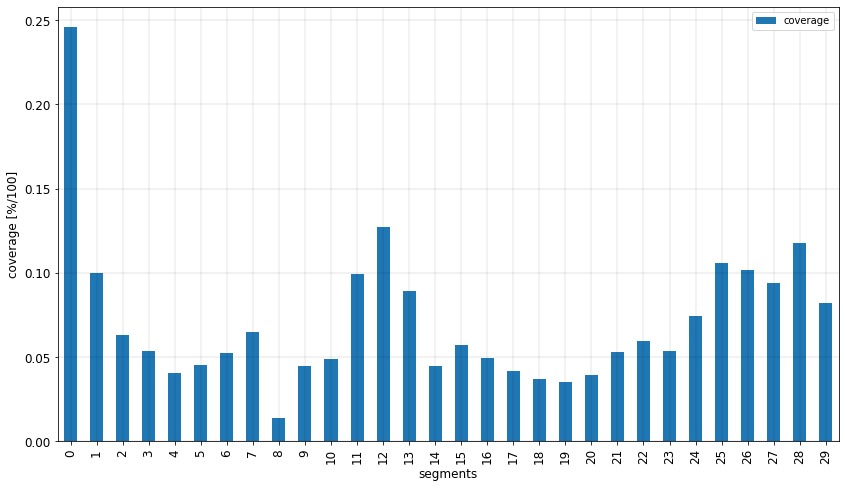

In [36]:
API.g4hunter.load_heatmap(g4hunter_analyse=analyses.iloc[2],coverage=True)

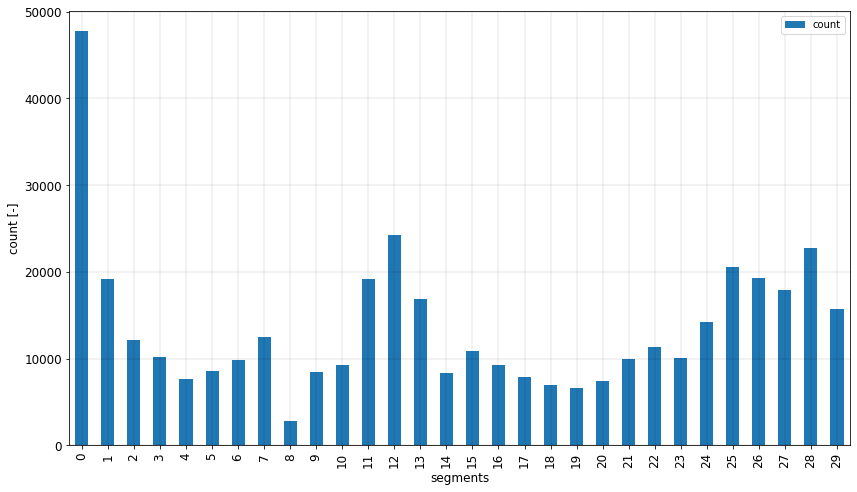

In [37]:
API.g4hunter.load_heatmap(g4hunter_analyse=analyses.iloc[2], coverage=False)